<a href="https://colab.research.google.com/github/A-Ohanusi/Regression-analysis/blob/main/Regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_excel("FeverTreeData.xlsx")

df.head()
New_df = df.rename(columns={'Unnamed: 0' : "Date" ,
                          'Unnamed: 1' : "Tesco Sales L" ,
                          'Unnamed: 2' : "Lidl Sales L" ,
                          'Unnamed: 3' : "Tesco Revenue"  ,
                          'Unnamed: 4' : "Lidl Revenue"  ,
                          'Unnamed: 5' : "Price Tesco"  ,
                          'Unnamed: 6' : "Price Lidl"  ,
                          'Unnamed: 7' : "Store Dist Tesco"  ,
                          'Unnamed: 8' : "Store Dist Lidl" ,
                          'Unnamed: 9' : "Advertising Ratings"  ,
                          'Unnamed: 10' : "Max Temp"  ,
                          'Unnamed: 11' : "Sun Hours"  ,
                          'Unnamed: 12' : "Rainfall"   })

df_1 = New_df.iloc[2:]


Tesco_df = df_1[['Date', "Tesco Sales L" , "Tesco Revenue", "Price Tesco" , "Store Dist Tesco" , "Advertising Ratings" , "Max Temp" , "Sun Hours" , "Rainfall"]].copy()

numeric_cols = ["Tesco Sales L" , "Price Tesco" , "Store Dist Tesco" , "Advertising Ratings" , "Max Temp" , "Sun Hours" , "Rainfall"]
for col in numeric_cols:
    Tesco_df[col] = pd.to_numeric(Tesco_df[col], errors='coerce')

Tesco_df.dropna(subset=numeric_cols, inplace=True)


Lidl_df = df_1[['Date', "Lidl Sales L" , "Lidl Revenue", "Price Lidl" , "Store Dist Lidl" , "Advertising Ratings" , "Max Temp" , "Sun Hours" , "Rainfall"]]

numeric_cols_lidl = ["Lidl Sales L" , "Price Lidl" , "Store Dist Lidl" , "Advertising Ratings" , "Max Temp" , "Sun Hours" , "Rainfall"]
for col in numeric_cols_lidl:
    Lidl_df[col] = pd.to_numeric(Lidl_df[col], errors='coerce')




x = Tesco_df[["Price Tesco" , "Store Dist Tesco" , "Advertising Ratings" , "Max Temp" , "Sun Hours" , "Rainfall"]]

y = Tesco_df["Tesco Sales L"]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:          Tesco Sales L   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     47.91
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           9.79e-33
Time:                        19:02:10   Log-Likelihood:                -1740.6
No. Observations:                 160   AIC:                             3495.
Df Residuals:                     153   BIC:                             3517.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.654e+04   1

/tmp/ipython-input-10-373615272.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lidl_df[col] = pd.to_numeric(Lidl_df[col], errors='coerce')


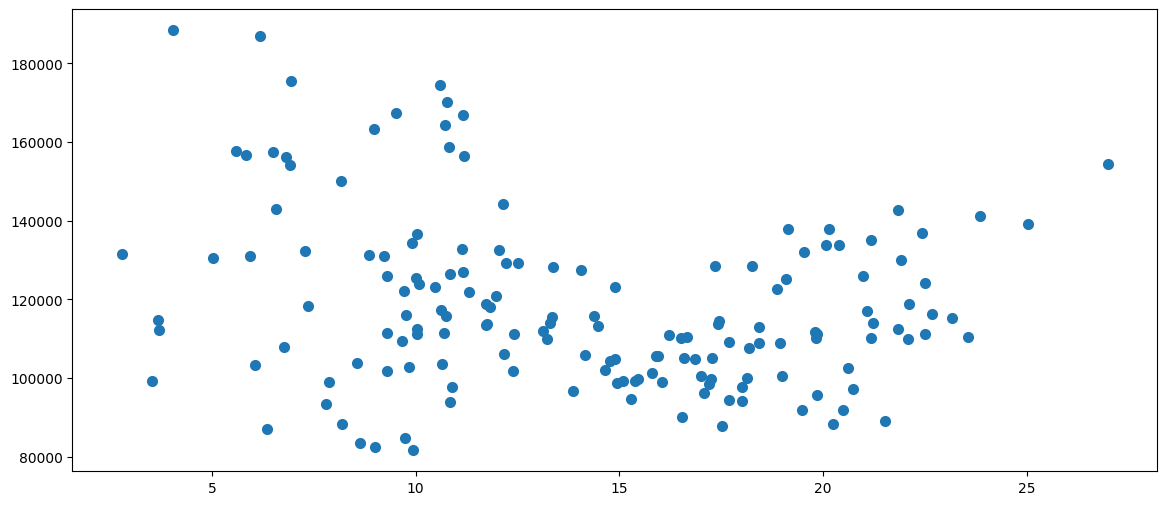

In [11]:
plt.figure(figsize=(14, 6))
plt.scatter(Tesco_df['Max Temp'], Tesco_df['Tesco Sales L'], label='Tesco Sales L', linewidth=2)

In [12]:
x = Lidl_df[["Price Lidl" , "Store Dist Lidl" , "Advertising Ratings" , "Max Temp" , "Sun Hours" , "Rainfall"]]

y = Lidl_df["Lidl Sales L"]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Lidl Sales L   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     88.51
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           3.24e-47
Time:                        19:02:11   Log-Likelihood:                -1663.5
No. Observations:                 160   AIC:                             3341.
Df Residuals:                     153   BIC:                             3363.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.265e+05   6

In [13]:
x = Tesco_df[["Price Tesco" , "Store Dist Tesco" , "Advertising Ratings" ]]

y = Tesco_df["Tesco Sales L"]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)





                            OLS Regression Results                            
Dep. Variable:          Tesco Sales L   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     95.85
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           3.23e-35
Time:                        19:02:11   Log-Likelihood:                -1741.6
No. Observations:                 160   AIC:                             3491.
Df Residuals:                     156   BIC:                             3504.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.638e+04   9

In [14]:
x = Lidl_df[["Price Lidl" , "Advertising Ratings" , "Max Temp" ]]

y = Lidl_df["Lidl Sales L"]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Lidl Sales L   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     175.6
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           8.49e-50
Time:                        19:02:11   Log-Likelihood:                -1665.2
No. Observations:                 160   AIC:                             3338.
Df Residuals:                     156   BIC:                             3351.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.337e+05   5

/tmp/ipython-input-15-1516064880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lidl_df['Date'] = pd.to_datetime(Lidl_df['Date'])


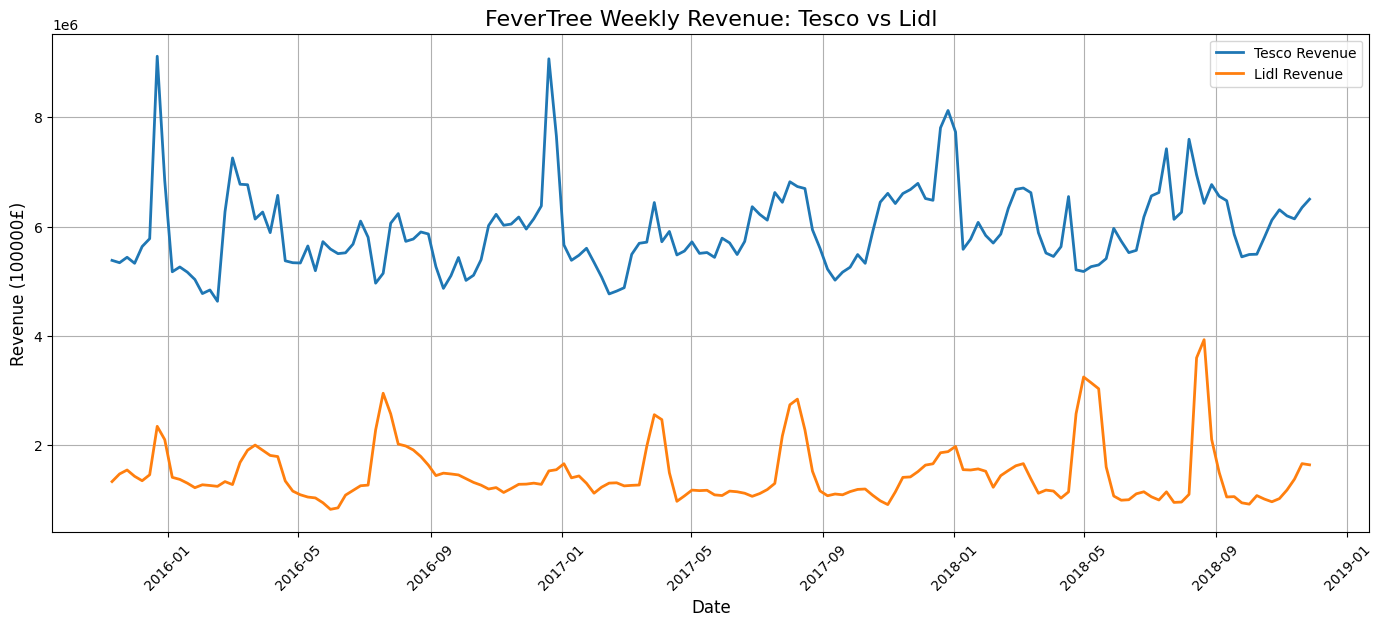

In [15]:
import matplotlib.pyplot as plt
Tesco_df['Date'] = pd.to_datetime(Tesco_df['Date'])
Lidl_df['Date'] = pd.to_datetime(Lidl_df['Date'])


plt.figure(figsize=(14, 6))
plt.plot(Tesco_df['Date'], Tesco_df['Tesco Revenue'], label='Tesco Revenue', linewidth=2)
plt.plot(Lidl_df['Date'], Lidl_df['Lidl Revenue'], label='Lidl Revenue', linewidth=2)


plt.title('FeverTree Weekly Revenue: Tesco vs Lidl', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue (100000£)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

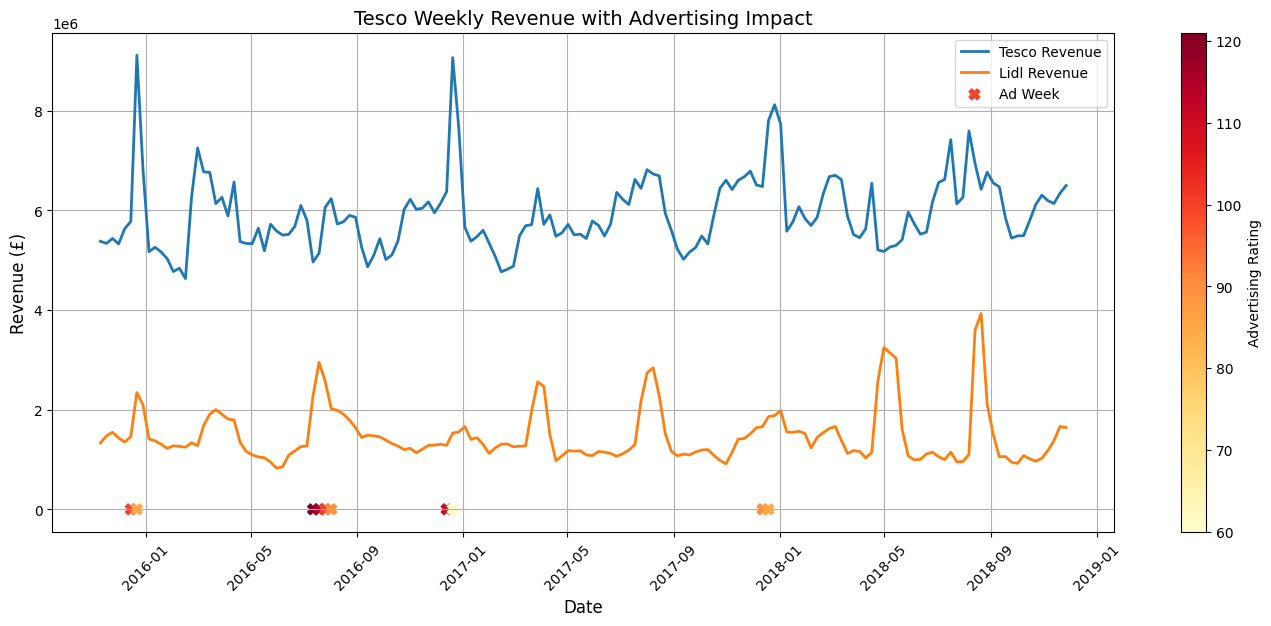

In [16]:
plt.figure(figsize=(14, 6))


plt.plot(Tesco_df['Date'], Tesco_df['Tesco Revenue'], label='Tesco Revenue', linewidth=2)
plt.plot(Lidl_df['Date'], Lidl_df['Lidl Revenue'], label='Lidl Revenue', linewidth=2)

ad_weeks = Tesco_df[Tesco_df['Advertising Ratings'] > 0]


plt.scatter(ad_weeks['Date'], [0] * len(ad_weeks),
            c=ad_weeks['Advertising Ratings'], cmap='YlOrRd',
            s=60, marker='X', label='Ad Week')


plt.title('Tesco Weekly Revenue with Advertising Impact', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.legend()
plt.colorbar(label='Advertising Rating')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()